<a href="https://colab.research.google.com/github/malvarezgarcia1213-png/Project-I-Deep-Learning-Image-Classification-with-CNN/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assessment Components
1. Data Preprocessing:

- Data loading and preprocessing (e.g., normalization, resizing, augmentation).
- Create visualizations of some images, and labels.

In [1]:
import kagglehub

# Download latest version
zip_path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Dataset descargado en:", zip_path)

Using Colab cache for faster access to the 'animals10' dataset.
Dataset descargado en: /kaggle/input/animals10


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Traduccion del diccionario

In [3]:
dataset_dir = "/kaggle/input/animals10/raw-img"  # Ajusta según donde esté tu carpeta

# Diccionario de traducción italiano -> inglés
translate_to_english = {
    "cane": "dog",
    "gatto": "cat",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "mucca": "cow",
    "pecora": "sheep",
    "ragno": "spider",
    "scoiattolo": "squirrel"
}

In [4]:
# Data augmentation para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalizar pixeles
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2       # 20% de validación
)

# Para validación solo normalizamos
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalización: convierte los valores de píxeles [0–255] → [0–1]
    validation_split=0.2,     # División: 80% entrenamiento / 20% validación
    rotation_range=25,        # Rotaciones aleatorias (augmentación)
    width_shift_range=0.2,    # Desplazamiento horizontal
    height_shift_range=0.2,   # Desplazamiento vertical
    shear_range=0.2,          # Transformación de corte
    zoom_range=0.2,           # Zoom aleatorio
    horizontal_flip=True,     # Volteo horizontal
    fill_mode='nearest'       # Cómo rellenar los píxeles vacíos tras una transformación
)

In [6]:
img_height, img_width = 128, 128
batch_size = 32

train_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [7]:
train_gen.class_indices = {translate_to_english[k]: v for k, v in train_gen.class_indices.items()}
val_gen.class_indices   = {translate_to_english[k]: v for k, v in val_gen.class_indices.items()}

print("Clases en inglés:", train_gen.class_indices)

Clases en inglés: {'dog': 0, 'horse': 1, 'elephant': 2, 'butterfly': 3, 'chicken': 4, 'cat': 5, 'cow': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


Visualización de ejemplos

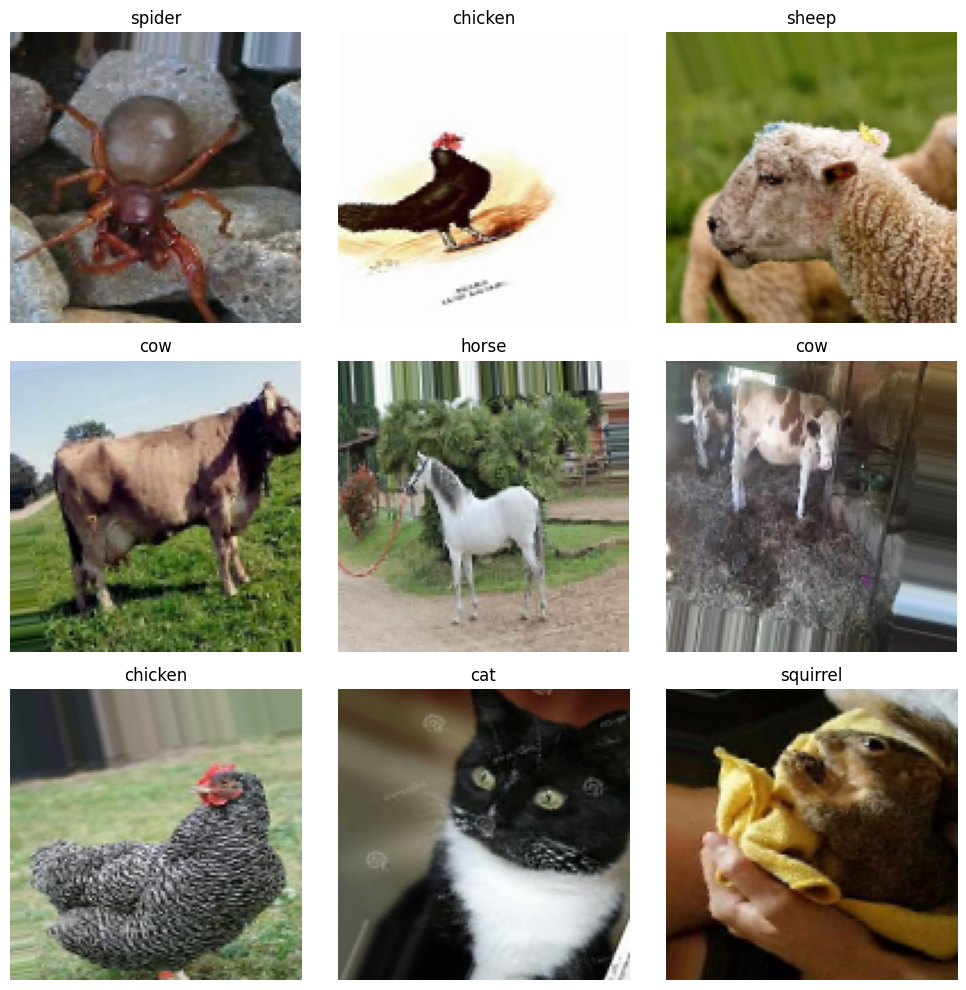

In [8]:
# Obtener un batch de imágenes y etiquetas
x_batch, y_batch = next(train_gen)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    label_index = np.argmax(y_batch[i])
    label_name = list(train_gen.class_indices.keys())[label_index]
    plt.title(label_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

2 . Model Architecture

- Design a CNN architecture suitable for image classification.
- Include convolutional layers, pooling layers, and fully connected layers.

In [9]:
img_height, img_width = 128, 128
batch_size = 32

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

Haciendo el Modelo

In [11]:
num_classes = 10  # 10 animales

model = models.Sequential([
    # --- Block 1 ---
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # --- Block 2 ---
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # --- Block 3 ---
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # --- Fully Connected ---
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # regularización para evitar overfitting
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,678,442 (33.11 MB)

 Trainable params: 8,678,442 (33.11 MB)

 Non-trainable params: 0 (0.00 B)

3. Model Training

- Train the CNN model using appropriate optimization techniques (e.g., stochastic gradient descent, Adam).
- Utilize techniques such as early stopping to prevent overfitting.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1964 - loss: 2.1936

655/655 ━━━━━━━━━━━━━━━━━━━━ 128s 188ms/step - accuracy: 0.1964 - loss: 2.1936 - val_accuracy: 0.2695 - val_loss: 2.0700
Epoch 2/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.2647 - loss: 2.0401

655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.2647 - loss: 2.0401 - val_accuracy: 0.3622 - val_loss: 1.7952
Epoch 3/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.3578 - loss: 1.8150

655/655 ━━━━━━━━━━━━━━━━━━━━ 117s 179ms/step - accuracy: 0.3578 - loss: 1.8149 - val_accuracy: 0.4048 - val_loss: 1.6769
Epoch 4/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.4179 - loss: 1.6725

655/655 ━━━━━━━━━━━━━━━━━━━━ 117s 178ms/step - accuracy: 0.4179 - loss: 1.6725 - val_accuracy: 0.5076 - val_loss: 1.3811
Epoch 5/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.4855 - loss: 1.4980

655/655 ━━━━━━━━━━━━━━━━━━━━ 117s 179ms/step - accuracy: 0.4855 - loss: 1.4980 - val_accuracy: 0.5195 - val_loss: 1.3349
Epoch 6/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5088 - loss: 1.4125

655/655 ━━━━━━━━━━━━━━━━━━━━ 118s 180ms/step - accuracy: 0.5088 - loss: 1.4125 - val_accuracy: 0.5398 - val_loss: 1.2942
Epoch 7/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.5389 - loss: 1.3325 - val_accuracy: 0.5082 - val_loss: 1.3657
Epoch 8/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.5525 - loss: 1.3026

655/655 ━━━━━━━━━━━━━━━━━━━━ 118s 180ms/step - accuracy: 0.5525 - loss: 1.3026 - val_accuracy: 0.5755 - val_loss: 1.2208
Epoch 9/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.5743 - loss: 1.2424

655/655 ━━━━━━━━━━━━━━━━━━━━ 120s 183ms/step - accuracy: 0.5743 - loss: 1.2424 - val_accuracy: 0.6088 - val_loss: 1.1374
Epoch 10/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5812 - loss: 1.2277

655/655 ━━━━━━━━━━━━━━━━━━━━ 118s 180ms/step - accuracy: 0.5812 - loss: 1.2277 - val_accuracy: 0.6206 - val_loss: 1.0947
Epoch 11/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 117s 179ms/step - accuracy: 0.5966 - loss: 1.1732 - val_accuracy: 0.6101 - val_loss: 1.1511
Epoch 12/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.5987 - loss: 1.1702 - val_accuracy: 0.6103 - val_loss: 1.1514
Epoch 13/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.6189 - loss: 1.1192

655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 182ms/step - accuracy: 0.6189 - loss: 1.1192 - val_accuracy: 0.6214 - val_loss: 1.1151
Epoch 14/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 124s 189ms/step - accuracy: 0.6296 - loss: 1.0998 - val_accuracy: 0.5885 - val_loss: 1.2172
Epoch 15/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.6352 - loss: 1.0701

655/655 ━━━━━━━━━━━━━━━━━━━━ 124s 189ms/step - accuracy: 0.6352 - loss: 1.0700 - val_accuracy: 0.6367 - val_loss: 1.0765
Epoch 16/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.6406 - loss: 1.0654

655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 182ms/step - accuracy: 0.6407 - loss: 1.0654 - val_accuracy: 0.6420 - val_loss: 1.0629
Epoch 17/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.6485 - loss: 1.0340

655/655 ━━━━━━━━━━━━━━━━━━━━ 118s 180ms/step - accuracy: 0.6485 - loss: 1.0340 - val_accuracy: 0.6835 - val_loss: 0.9381
Epoch 18/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 116s 178ms/step - accuracy: 0.6556 - loss: 1.0052 - val_accuracy: 0.6797 - val_loss: 0.9362
Epoch 19/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.6732 - loss: 0.9825 - val_accuracy: 0.6716 - val_loss: 0.9795
Epoch 20/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.6704 - loss: 0.9666

655/655 ━━━━━━━━━━━━━━━━━━━━ 122s 186ms/step - accuracy: 0.6704 - loss: 0.9666 - val_accuracy: 0.6898 - val_loss: 0.9410
Epoch 21/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6794 - loss: 0.9442

655/655 ━━━━━━━━━━━━━━━━━━━━ 124s 190ms/step - accuracy: 0.6794 - loss: 0.9443 - val_accuracy: 0.7043 - val_loss: 0.8661
Epoch 22/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 122s 186ms/step - accuracy: 0.6838 - loss: 0.9542 - val_accuracy: 0.6907 - val_loss: 0.9286
Epoch 23/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 121s 184ms/step - accuracy: 0.6873 - loss: 0.9349 - val_accuracy: 0.6466 - val_loss: 1.0455
Epoch 24/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 120s 183ms/step - accuracy: 0.6906 - loss: 0.9124 - val_accuracy: 0.6282 - val_loss: 1.1098
Epoch 25/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 121s 185ms/step - accuracy: 0.6985 - loss: 0.9046 - val_accuracy: 0.6183 - val_loss: 1.1707
Epoch 26/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 182ms/step - accuracy: 0.7059 - loss: 0.8931 - val_accuracy: 0.7020 - val_loss: 0.8884


4. Model Evaluation

- Evaluate the trained model on a separate validation set.
- ompute and report metrics such as accuracy, precision, recall, and F1-score.
- Visualize the confusion matrix to understand model performance across different classes.

In [18]:
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

164/164 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.6962 - loss: 0.8756
Validation Loss: 0.8661
Validation Accuracy: 0.7043


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Obtener predicciones
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Etiquetas reales
y_true = val_gen.classes

# Nombres de clases
class_names = list(val_gen.class_indices.keys())

# Reporte de métricas
print(classification_report(y_true, y_pred_classes, target_names=class_names))

164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step
              precision    recall  f1-score   support

         dog       0.20      0.18      0.19       972
       horse       0.10      0.09      0.09       524
    elephant       0.06      0.08      0.07       289
   butterfly       0.10      0.11      0.10       422
     chicken       0.13      0.19      0.15       619
         cat       0.04      0.03      0.03       333
         cow       0.07      0.06      0.06       373
       sheep       0.07      0.07      0.07       364
      spider       0.18      0.15      0.16       964
    squirrel       0.05      0.04      0.04       372

    accuracy                           0.12      5232
   macro avg       0.10      0.10      0.10      5232
weighted avg       0.12      0.12      0.12      5232



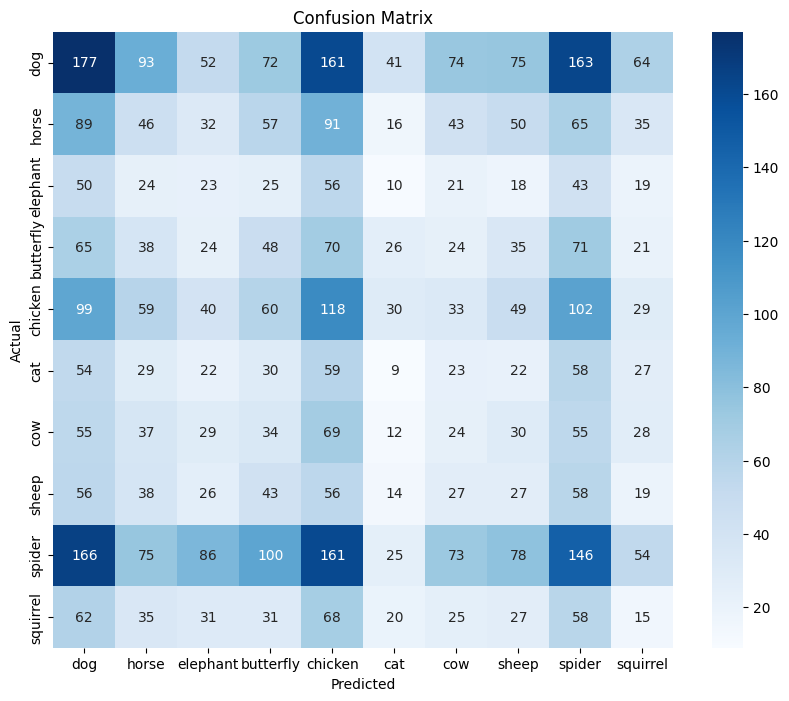

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()